# **Part 1** - Optimization and Algorithms Project

## 1 - Transferring a robot

A function to plot the results was created to keep the code short, concise and coherent.

In [ ]:
def plot_results(x,u,w,tau):
    #https://matplotlib.org/tutorials/introductory/pyplot.html
    plt.figure(1)
    for k in range(K):
        plt.plot(w[k,0], w[k,1], 'rs')

    for k in range(K):
        plt.plot(x.value[tau[k],0], x.value[tau[k],1], 'ro')

    plt.plot(x.value[:,0],x.value[:,1], 'b.')
    plt.grid()
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Path of robot')

    plt.figure(2)
    plt.plot(range(T),u.value[:,0],label='u1(t)')
    plt.plot(range(T),u.value[:,1],label='u2(t)')
    plt.xlabel('time')
    plt.ylabel('force')
    plt.title('Force inputs')
    plt.legend()

    waypoint_deviation = 0
    for k in range (K):
        waypoint_deviation += 1/K * np.linalg.norm(np.matmul( E , x.value[tau[k]] ) - w[k],2)

    print("Waypoint deviation = " + str(waypoint_deviation))

    i = 0
    for n in range(T):
        if(np.linalg.norm(u.value[n,:]-u.value[n-1,:]) > 10**(-4)):   
            i += 1

    print("Optimal Control Signal Changes = " + str(i))

    plt.show()

### 1.1

In [ ]:
# Import packages.
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt

# Generate data.
A = np.array([[1, 0, 0.1, 0], [0, 1, 0, 0.1], [0, 0, 0.9, 0],[0,0,0,0.9]])
B = np.array([[0,0],[0,0],[0.1,0],[0,0.1]])
Umax = 100
T = 80
x_initial = np.array([0,5,0,0])
x_final = np.array([15,-15,0,0])
w = np.array([[10,10],[20,10],[30,10],[30,0],[20,0],[10,-10]])
tau = np.array([10,25,30,40,50,60])
K = 6
E = np.array([[1,0,0,0],[0,1,0,0]])

### 1.2

$$  
  \begin{equation*}
  \begin{aligned}
  & \underset{x,u}{\text{minimize}}
  & & \sum_{k=1}^{k} ||Ex(\tau_k)-w_k||^2+\lambda \sum_{t=1}^{T-1}||u(t)-u(t-1)||^2  \\
  & \text{subject to}
  & & x(0) = x_{initial} \\
  & & & x(T) = x_{final} \\
  & & & ||u(t)|| \le U_{max} \\
  & & & x(t+1) = Ax(t) + Bu(t)
  \end{aligned}
  \end{equation*}
$$

In [ ]:
# Define and solve the CVXPY problem.

## Declare Variables to be Optimized
x = cp.Variable((T,4))
u = cp.Variable((T,2))

## Declare parameter lambda so it can be changed after problem formulation
lam = cp.Parameter(nonneg=True)

## Cost Function
cost = sum( [ (cp.pnorm(E @ x[tau[n]] - w[n],2)**2) for n in range(K)] )

for t in range(1, T):
    cost += lam * (cp.pnorm(u[t,:] - u[t-1,:],2))**2

## Constraints
# Overall constraints
constraints = [ 
               x[0,:] == x_initial,
               x[T-1,:] == x_final
               ]

# Element wise constraints
for t in range(T-1):
    constraints += [
        x[t+1,:] == A @ x[t,:] + B @ u[t,:],
        cp.pnorm(u[t],2) <= Umax 
    ]

obj = cp.Minimize(cost)

prob = cp.Problem(obj,constraints)

#### $\lambda = 10^{-3}$

In [ ]:
lam.value = 10**(-3)
prob.solve()

2.3189303441165365

We can then plot the results. 
1. The first plot is the robots position for the optimized input force over time. The red squares are the waypoints (defined as the matrix $w$) and the red circles are the robot positions ate the apointed time of the waypoints.
2. The second plot are the input forces. Blue is $u_1(t)$ and Orange is $u_2(t)$.

Waypoint deviation = 0.12653634833380814
Optimal Control Signal Changes = 79


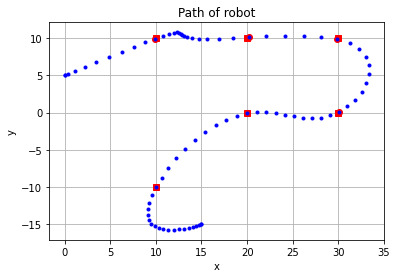

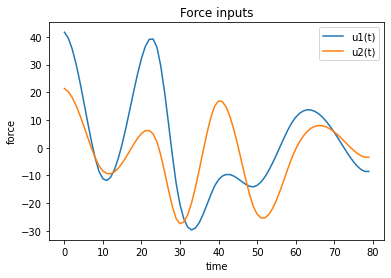

In [ ]:
plot_results(x,u,w,tau)

#### $\lambda = 10^{-2}$

In [ ]:
lam.value = 10**(-2)
prob.solve()

16.162675092628866

Waypoint deviation = 0.8291418701691656
Optimal Control Signal Changes = 79


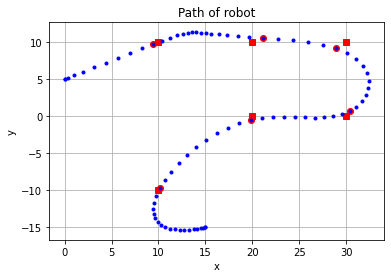

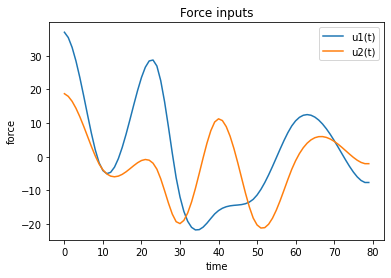

In [ ]:
plot_results(x,u,w,tau)

#### $\lambda = 10^{-1}$

In [ ]:
lam.value = 10**(-1)
prob.solve()

55.6492075247251

Waypoint deviation = 2.206581300320847
Optimal Control Signal Changes = 79


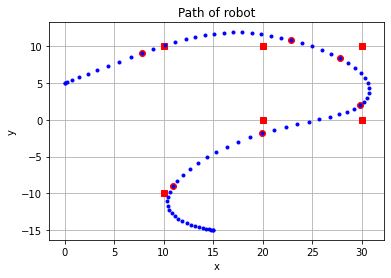

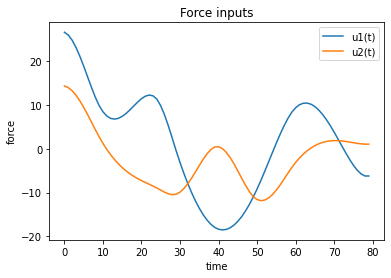

In [ ]:
plot_results(x,u,w,tau)

#### $\lambda = 10^{0}$

In [ ]:
lam.value = 1
prob.solve()

148.3535189509028

Waypoint deviation = 3.7140231509139032
Optimal Control Signal Changes = 79


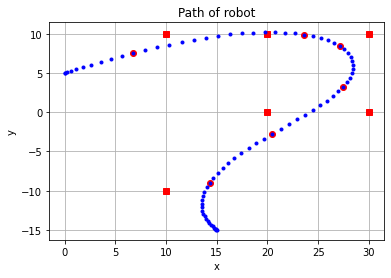

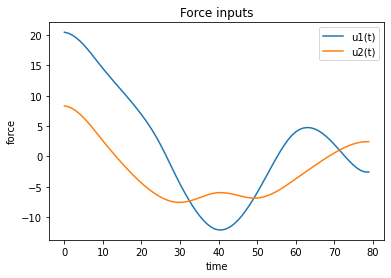

In [ ]:
plot_results(x,u,w,tau)

#### $\lambda = 10^{1}$

In [ ]:
lam.value = 10
prob.solve()

436.0148536148282

Waypoint deviation = 5.627997634931546
Optimal Control Signal Changes = 79


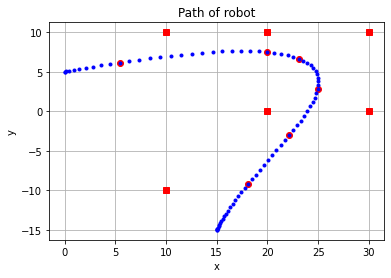

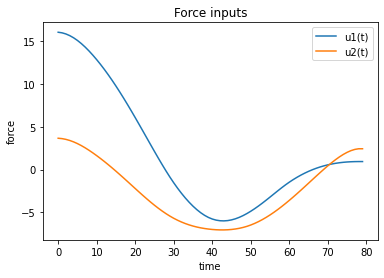

In [ ]:
plot_results(x,u,w,tau)

#### $\lambda = 10^{2}$

In [ ]:
lam.value = 10**(2)
prob.solve()

1297.1525812977266

Waypoint deviation = 11.029778990641217
Optimal Control Signal Changes = 79


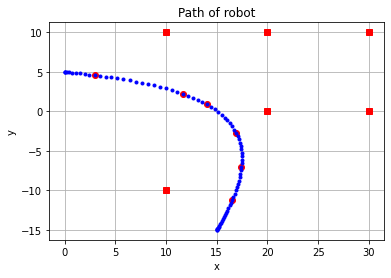

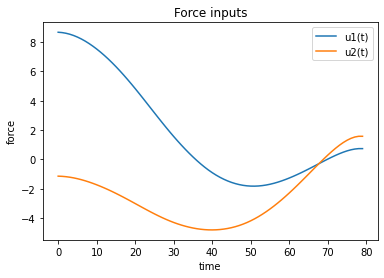

In [ ]:
plot_results(x,u,w,tau)

#### $\lambda = 10^{3}$

In [ ]:
lam.value = 10**(3)
prob.solve()

2493.6400998116633

Waypoint deviation = 15.394723280425408
Optimal Control Signal Changes = 79


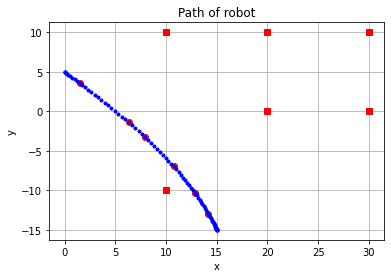

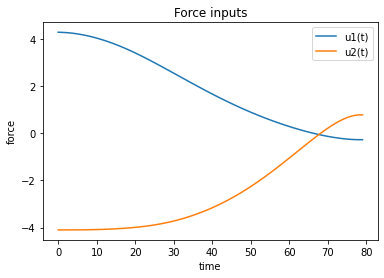

In [ ]:
plot_results(x,u,w,tau)

### 1.3

Now we remove the square from regularizer and compare the results.
$$  
  \begin{equation*}
  \begin{aligned}
  & \underset{x,u}{\text{minimize}}
  & & \sum_{k=1}^{k} ||Ex(\tau_k)-w_k||^2+\lambda \sum_{t=1}^{T-1}||u(t)-u(t-1)||  \\
  & \text{subject to}
  & & x(0) = x_{initial} \\
  & & & x(T) = x_{final} \\
  & & & ||u(t)|| \le U_{max} \\
  & & & x(t+1) = Ax(t) + Bu(t)
  \end{aligned}
  \end{equation*}
$$

In [ ]:
## Declare Variables to be Optimized
x = cp.Variable((T,4))
u = cp.Variable((T,2))

cost = sum( [ (cp.pnorm(E @ x[tau[n]] - w[n],2)**2) for n in range(K)] )

for t in range(1, T):
    cost += lam * (cp.pnorm(u[t] - u[t-1],2))

## Constraints
# Overall constraints
constraints = [ 
               x[0,:] == x_initial,
               x[T-1,:] == x_final
               ]

# Element wise constraints
for t in range(T-1):
    constraints += [
        x[t+1,:] == A @ x[t,:] + B @ u[t,:],
        cp.pnorm(u[t],2) <= Umax 
    ]

obj = cp.Minimize(cost)
prob = cp.Problem(obj,constraints)

#### $\lambda = 10^{-3}$

In [ ]:
lam.value = 10**(-3)
prob.solve()

0.2905872336518526

Waypoint deviation = 0.0075260515065971026
Optimal Control Signal Changes = 8


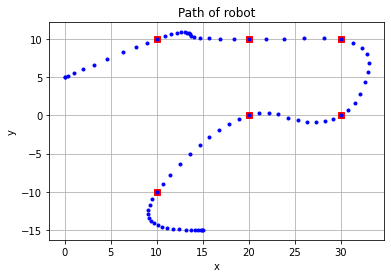

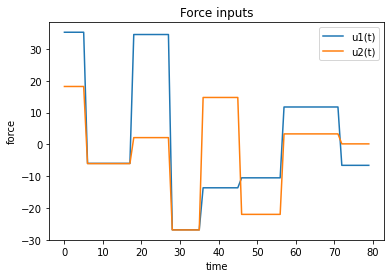

In [ ]:
plot_results(x,u,w,tau)

#### $\lambda = 10^{-2}$

In [ ]:
lam.value = 10**(-2)
prob.solve()

2.871779498846874

Waypoint deviation = 0.07490042785104145
Optimal Control Signal Changes = 8


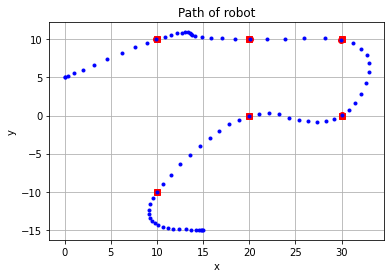

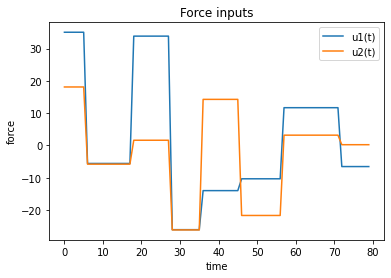

In [ ]:
plot_results(x,u,w,tau)

#### $\lambda = 10^{-1}$

In [ ]:
lam.value = 10**(-1)
prob.solve()

25.52903445570429

Waypoint deviation = 0.7042847620936804
Optimal Control Signal Changes = 10


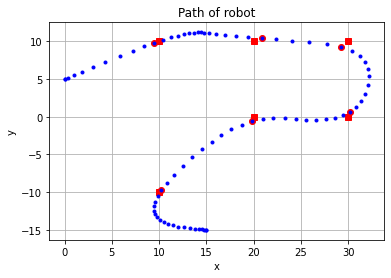

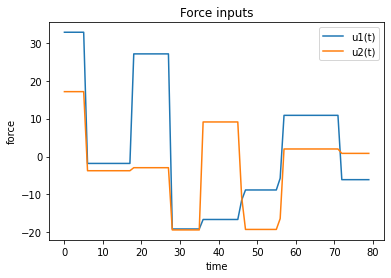

In [ ]:
plot_results(x,u,w,tau)

#### $\lambda = 10^{0}$

In [ ]:
lam.value = 1
prob.solve()

126.96993905558799

Waypoint deviation = 2.902559005393649
Optimal Control Signal Changes = 6


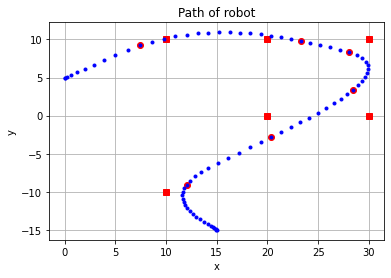

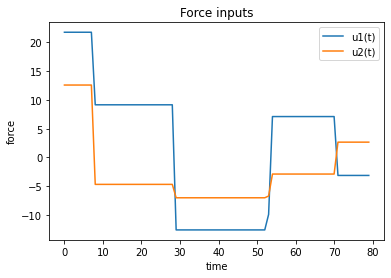

In [ ]:
plot_results(x,u,w,tau)

#### $\lambda = 10^{1}$

In [ ]:
lam.value = 10
prob.solve()

504.7939675985099

Waypoint deviation = 5.360819048216747
Optimal Control Signal Changes = 4


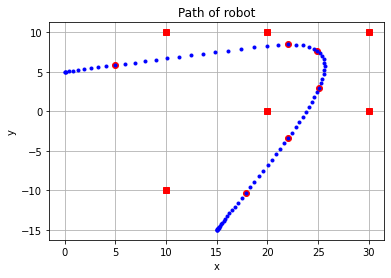

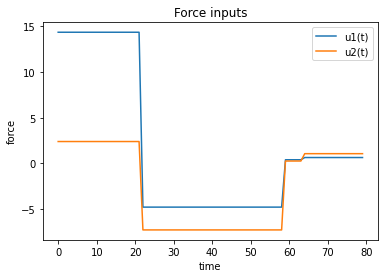

In [ ]:
plot_results(x,u,w,tau)

#### $\lambda = 10^{2}$

In [ ]:
lam.value = 10**(2)
prob.solve()

2209.419903301646

Waypoint deviation = 12.656066807343135
Optimal Control Signal Changes = 3


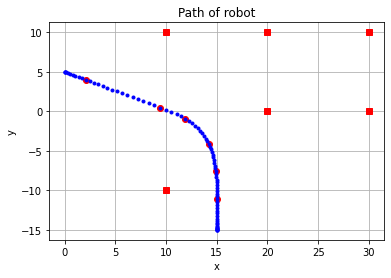

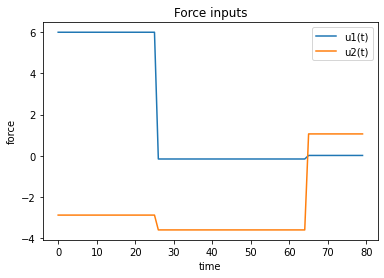

In [ ]:
plot_results(x,u,w,tau)

#### $\lambda = 10^{3}$

In [ ]:
lam.value = 10**(3)
prob.solve()

7002.02953668369

Waypoint deviation = 16.27485839271584
Optimal Control Signal Changes = 2


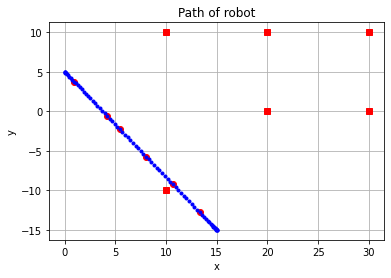

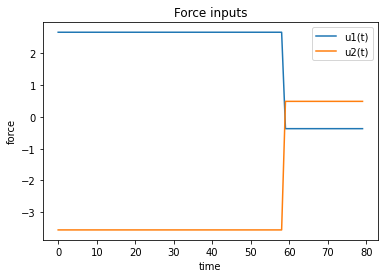

In [ ]:
plot_results(x,u,w,tau)

### 1.4

In [ ]:
## Declare Variables to be Optimized
x = cp.Variable((T,4))
u = cp.Variable((T,2))

cost = sum( [ (cp.pnorm(E @ x[tau[n]] - w[n],2)**2) for n in range(K)] )

for t in range(1, T):
    cost += lam * (cp.pnorm(u[t] - u[t-1],1))

## Constraints
# Overall constraints
constraints = [ 
               x[0,:] == x_initial,
               x[T-1,:] == x_final
               ]

# Element wise constraints
for t in range(T-1):
    constraints += [
        x[t+1,:] == A @ x[t,:] + B @ u[t,:],
        cp.pnorm(u[t],2) <= Umax 
    ]

obj = cp.Minimize(cost)
prob = cp.Problem(obj,constraints)

#### $\lambda = 10^{-3}$

In [ ]:
lam.value = 10**(-3)
prob.solve()

0.3639506107229824

Waypoint deviation = 0.010834711962522931
Optimal Control Signal Changes = 12


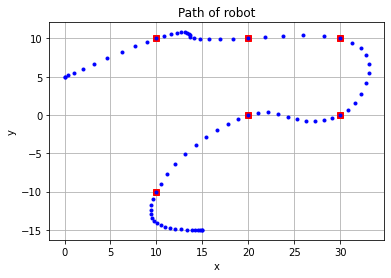

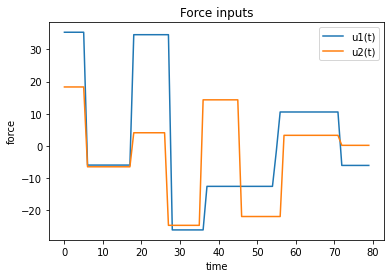

In [ ]:
plot_results(x,u,w,tau)

#### $\lambda = 10^{-2}$

In [ ]:
lam.value = 10**(-2)
prob.solve()

3.5665934853624095

Waypoint deviation = 0.10738083162217865
Optimal Control Signal Changes = 11


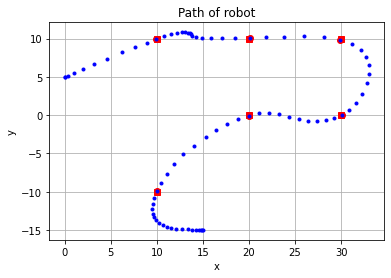

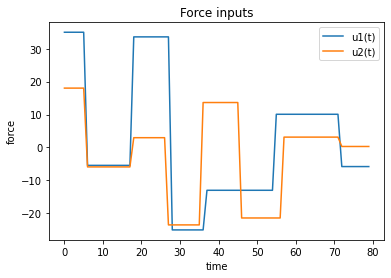

In [ ]:
plot_results(x,u,w,tau)

#### $\lambda = 10^{-1}$

In [ ]:
lam.value = 10**(-1)
prob.solve()

29.414844711987342

Waypoint deviation = 0.8922241950430558
Optimal Control Signal Changes = 14


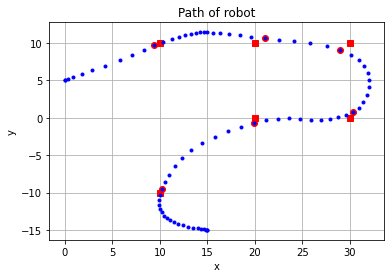

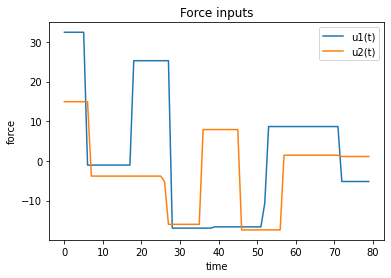

In [ ]:
plot_results(x,u,w,tau)

#### $\lambda = 10^{0}$

In [ ]:
lam.value = 10**(0)
prob.solve()

138.80704749396037

Waypoint deviation = 2.8940849000558297
Optimal Control Signal Changes = 10


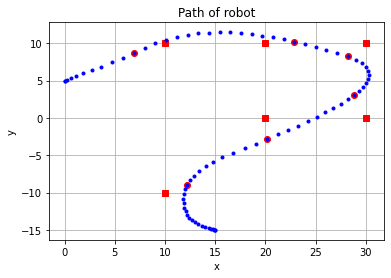

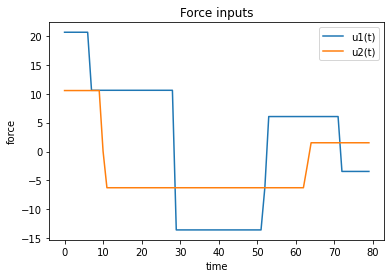

In [ ]:
plot_results(x,u,w,tau)

#### $\lambda = 10^{1}$

In [ ]:
lam.value = 10**(1)
prob.solve()

594.5977225519669

Waypoint deviation = 5.421924524677606
Optimal Control Signal Changes = 6


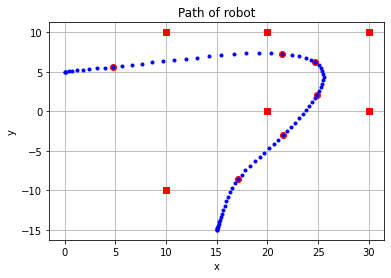

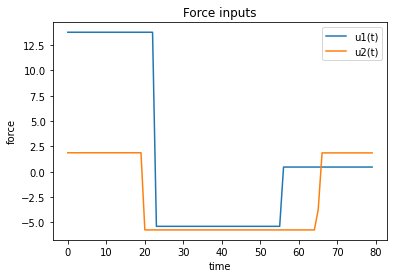

In [ ]:
plot_results(x,u,w,tau)

#### $\lambda = 10^{2}$

In [ ]:
lam.value = 10**(2)
prob.solve()

2216.225634852635

Waypoint deviation = 13.094034792975402
Optimal Control Signal Changes = 3


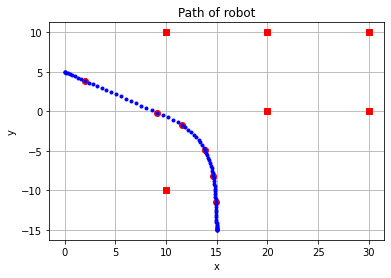

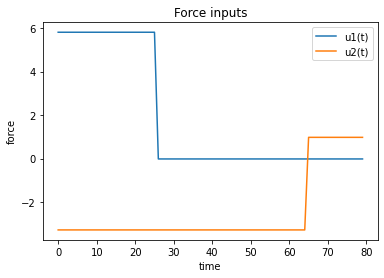

In [ ]:
plot_results(x,u,w,tau)

#### $\lambda = 10^{3}$

In [ ]:
lam.value = 10**(3)
prob.solve()

9003.994659287611

Waypoint deviation = 16.075380063793776
Optimal Control Signal Changes = 3


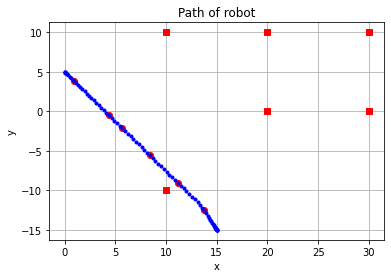

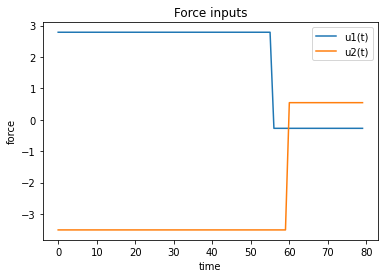

In [ ]:
plot_results(x,u,w,tau)

##2 - Locating a moving target

p_0=[-0.60420065 -3.25237183] v=[1.26495079 1.68075889] p[t*]=[ 9.51540567 10.19369932] distance=3.5207380498715874
a1=9.512187841372409 a2=14.190188891604238 b1=7.520306067674468 b2=12.945777974441587


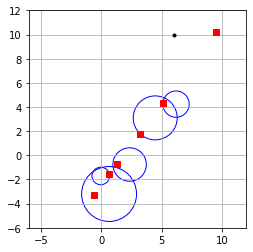

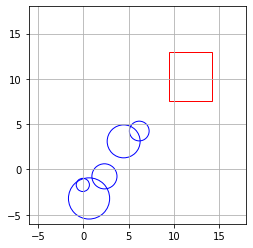

In [ ]:

def plotCircle(c, R):
    ax = plt.gca()
    circle = plt.Circle(c,R, fill = False, color ='b')
    ax.add_patch(circle)

def plotRectangle(a1,a2,b1,b2):
    ax = plt.gca()
    rectangle = plt.Rectangle((a1,b1), a2-a1, b2-b1, fill=False, edgecolor='r', linewidth=1)
    ax.add_patch(rectangle)


K = 5
x_ast = np.array([6,10])
t_ast = 8

#tau = np.array([0,1,1.5,3,4.5])
#c = np.array([[-1.721,-4.3454],[1.055,-3.0293],[2.9619,-1.5857],[3.8476,1.2253],[7.1086,4.9975]])
#R = np.array([0.9993,1.4618,2.2617,1.0614,1.6983])
tau = np.array([0,1,1.5,3,4.5])
c = np.array([[0.6332,-3.2012],[-0.054,-1.7104],[2.3322,-0.7620],[4.4526,3.1001],[6.1752,4.2391]])
R = np.array([2.2727,0.7281,1.3851,1.8191,1.0895])

# Define and solve the CVXPY problem.

## Declare Variables to be Optimized
p_0 = cp.Variable(2)
v = cp.Variable(2)

cost = cp.pnorm(p_0 + t_ast*v - x_ast,2)**2


## Constraints

# Element wise constraints
constraints = []
for k in range(K):
    constraints += [
        cp.pnorm(p_0 + tau[k]*v - c[k],2) <= R[k] 
    ]

obj = cp.Minimize(cost)

prob = cp.Problem(obj,constraints)

prob.solve()

print("p_0="+str(p_0.value) + 
" v=" + str(v.value) + 
" p[t*]="+ str(p_0.value + t_ast*v.value) + 
" distance=" + str(np.linalg.norm(p_0.value + t_ast * v.value - x_ast,2)))

plt.figure(1)
for k in range(K):
    plotCircle(c[k],R[k])
    plt.plot(p_0.value[0]+v.value[0]*tau[k], p_0.value[1]+v.value[1]*tau[k], 'rs')

plt.plot(p_0.value[0]+v.value[0]*t_ast, p_0.value[1]+v.value[1]*t_ast, 'rs')
plt.plot(x_ast[0], x_ast[1], 'k.')
ax = plt.gca()
ax.axis("scaled")
ax.set(xlim=(-6, 12), ylim=(-6, 12))
plt.grid()


cost = p_0[0] + t_ast*v[0]
obj = cp.Minimize(cost)
prob = cp.Problem(obj,constraints)
prob.solve()
a1 = p_0.value[0] + t_ast*v.value[0]

cost = p_0[0] + t_ast*v[0]
obj = cp.Maximize(cost)
prob = cp.Problem(obj,constraints)
prob.solve()
a2 = p_0.value[0] + t_ast*v.value[0]

cost = p_0[1] + t_ast*v[1]
obj = cp.Minimize(cost)
prob = cp.Problem(obj,constraints)
prob.solve()
b1 = p_0.value[1] + t_ast*v.value[1]

cost = p_0[1] + t_ast*v[1]
obj = cp.Maximize(cost)
prob = cp.Problem(obj,constraints)
prob.solve()
b2 = p_0.value[1] + t_ast*v.value[1]



print('a1='+str(a1)+' a2='+str(a2)+' b1='+str(b1)+' b2='+str(b2))

plt.figure(2)
for k in range(K):
    plotCircle(c[k],R[k])

plotRectangle(a1,a2,b1,b2)
ax = plt.gca()
ax.axis("scaled")
ax.set(xlim=(-6, 18), ylim=(-6, 18))
plt.grid()
plt.show()